Loading in Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kmodes.kprototypes import KPrototypes

Loading in Data

In [3]:
df = pd.read_csv('Data.csv')
df.head()

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


Editing dataset

In [4]:
# Setting column names
df = df.rename(columns={'STUDENT ID':'student_id', '1':'age', '2':'sex', '3':'high_school_type', '4':'scholarship_type', '5':'additional_work',
                       '6': 'additional_activity', '7':'partner_status', '8':'salary', '9':'transportation_method', '10':'housing',
                        '11':'mother_education', '12':'father_education', '13':'siblings', '14':'parental_status', '15':'mother_occupation',
                       '16':'father_occupation', '17':'weekly_study_hours', '18':'reading_frequency', '19':'academic_reading_frequency',
                       '20':'seminar_attendance', '21':'project_impact', '22':'class_attendance', '23':'study_with', '24':'study_when',
                       '25':'taking_notes', '26':'listening_in_class', '27':'discussion', '28':'flip_classroom', '29':'GPA_last_semester',
                       '30':'expected_GPA', 'COURSE ID':'course_id', 'GRADE':'grade'})

In [5]:
# Changing values to be more descriptive
df['age'] = df['age'].replace({1:'18-21', 2:'22-25', 3:'above 26'})
df['sex'] = df['sex'].replace({1:'female', 2:'male'})
df['high_school_type'] = df['high_school_type'].replace({1:'private', 2:'state', 3:'other'})
df['scholarship_type'] = df['scholarship_type'].replace({1:'none', 2:'25%', 3:'50%', 4:'75%', 5:'full'})
df['additional_work'] = df['additional_work'].replace({1:'yes', 2:'no'})
df['additional_activity'] = df['additional_activity'].replace({1:'yes', 2:'no'})
df['partner_status'] = df['partner_status'].replace({1:'yes', 2:'no'})
df['salary'] = df['salary'].replace({1:'135-200', 2:'201-270', 3:'271-340', 4:'341-410', 5:'above 410'})
df['transportation_method'] = df['transportation_method'].replace({1:'bus', 2:'private car/taxi', 3:'bicycle', 4:'other'})
df['housing'] = df['housing'].replace({1:'rental', 2:'dorm', 3:'with family', 4:'other'})
df['mother_education'] = df['mother_education'].replace({1:'primary school', 2:'secondary school', 3:'high school', 4:'university', 5:'masters', 6:'Ph.D'})
df['father_education'] = df['father_education'].replace({1:'primary school', 2:'secondary school', 3:'high school', 4:'university', 5:'masters', 6:'Ph.D'})
df['siblings'] = df['siblings'].replace({'1':'1', '2':'2', '3':'3', '4':'4', '5':'5 or above'})
df['parental_status'] = df['parental_status'].replace({1:'married', 2:'divorced', 3:'died - one or both'})
df['mother_occupation'] = df['mother_occupation'].replace({1:'retired', 2:'housewife', 3:'government officer', 4:'private sector employee', 5:'self-employment', 6:'other'})
df['father_occupation'] = df['father_occupation'].replace({1:'retired', 2:'government_officer', 3:'private sector employee', 4:'self-employed', 5:'other'})
df['weekly_study_hours'] = df['weekly_study_hours'].replace({1:'none', 2:'<5 hours', 3:'6-10 hours', 4:'11-20 hours', 5:'>20 hours'})
df['reading_frequency'] = df['reading_frequency'].replace({1:'none', 2:'sometimes', 3:'often'})
df['academic_reading_frequency'] = df['academic_reading_frequency'].replace({1:'none', 2:'sometimes', 3:'often'})
df['seminar_attendance'] = df['seminar_attendance'].replace({1:'yes', 2:'no'})
df['project_impact'] = df['project_impact'].replace({1:'positive', 2:'negative', 3:'neutral'})
df['class_attendance'] = df['class_attendance'].replace({1:'always', 2:'sometimes', 3:'neutral'})
df['study_with'] = df['study_with'].replace({1:'alone', 2:'with friends', 3:'n/a'})
df['study_when'] = df['study_when'].replace({1:'close to exam date', 2:'regularly throughout semester', 3:'never'})
df['taking_notes'] = df['taking_notes'].replace({1:'never', 2:'sometimes', 3:'always'})
df['listening_in_class'] = df['listening_in_class'].replace({1:'never', 2:'sometimes', 3:'always'})
df['discussion'] = df['discussion'].replace({1:'never', 2:'sometimes', 3:'always'})
df['flip_classroom'] = df['flip_classroom'].replace({1:'not useful', 2:'useful', 3:'n/a'})
df['GPA_last_semester'] = df['GPA_last_semester'].replace({1: '<2.00', 2: '2.00-2.49', 3: '2.50-2.99', 4: '3.00-3.49', 5: 'above 3.49'})
df['expected_GPA'] = df['expected_GPA'].replace({1: '<2.00', 2: '2.00-2.49', 3: '2.50-2.99', 4: '3.00-3.49', 5: 'above 3.49'})
df['grade'] = df['grade'].replace({0:'fail', 1: 'DD', 2: 'DC', 3: 'CC', 4: 'CB', 5: 'BB', 6: 'BA', 7: 'AA'})
# Adding num_grade and num_GPA_last_semester columns
df['num_GPA_last_semester'] = df['GPA_last_semester'].replace({'<2.00': 2.00, '2.00-2.49': 2.49, '2.50-2.99': 2.99, '3.00-3.49': 3.49, 'above 3.49': 4.00})
df['num_grade'] = df['grade'].replace({'fail':49, 'DD':59, 'DC':69, 'CC':74, 'CB':79, 'BB':84, 'BA':89, 'AA':100})
df['grade2'] = df['grade'].replace({'DD': '50-59', 'DC': '60-69', 'CC': '70-79', 'CB': '70-79', 'BB': '80-89', 'BA': '80-89', 'AA': '90-100'})
df.head()

,student_id,age,sex,high_school_type,scholarship_type,additional_work,additional_activity,partner_status,salary,transportation_method,...,listening_in_class,discussion,flip_classroom,GPA_last_semester,expected_GPA,course_id,grade,num_GPA_last_semester,num_grade,grade2
0,STUDENT1,22-25,male,other,50%,yes,no,no,135-200,bus,...,sometimes,never,useful,<2.00,<2.00,1,DD,2.00,59,50-59
1,STUDENT2,22-25,male,other,50%,yes,no,no,135-200,bus,...,sometimes,always,useful,2.00-2.49,2.50-2.99,1,DD,2.49,59,50-59
2,STUDENT3,22-25,male,state,50%,no,no,no,201-270,other,...,sometimes,never,not useful,2.00-2.49,2.00-2.49,1,DD,2.49,59,50-59
3,STUDENT4,18-21,female,private,50%,yes,no,yes,201-270,bus,...,sometimes,sometimes,not useful,2.50-2.99,2.00-2.49,1,DD,2.99,59,50-59
4,STUDENT5,22-25,male,private,50%,no,no,yes,271-340,bus,...,sometimes,sometimes,not useful,2.00-2.49,2.00-2.49,1,DD,2.49,59,50-59


Finding distribution of grades

In [6]:
df['weekly_study_hours'].value_counts(normalize=True).sort_index()*100

11-20 hours     5.517241
6-10 hours     20.689655
<5 hours       51.034483
>20 hours       2.758621
none           20.000000
Name: weekly_study_hours, dtype: float64

Text(0.5, 1.0, 'Percent Frequency of Grades')

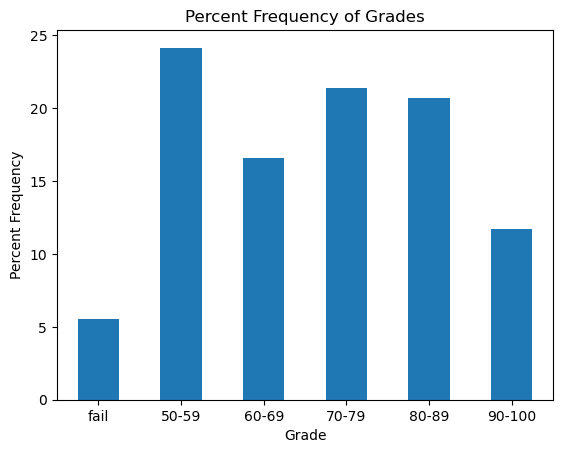

In [7]:
grade_distribution = df['grade2'].value_counts(normalize=True).sort_index()[['fail','50-59','60-69','70-79', '80-89', '90-100']]*100
grade_distribution.plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Grade')
plt.ylabel('Percent Frequency')
plt.title('Percent Frequency of Grades')

Clustering personal variables

In [9]:
personal = df[['age', 'sex', 'high_school_type', 'scholarship_type', 'additional_work', 'additional_activity', 'partner_status', 'transportation_method', 'housing']].copy()
# numerically encoding nominal variables
personal['age'] = personal['age'].replace({'18-21':0, '22-25':1, 'above 26':2})
personal['scholarship_type'] = personal['scholarship_type'].replace({'none':0, '25%':1, '50%':2, '75%':3, 'full':4})

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 0, ncost: 286.19989869575886
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 0, ncost: 286.19989869575886
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 0, ncost: 286.19989869575886
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/20, moves: 0, ncost: 286.19989869575886
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/20, moves: 0, ncost: 286.19989869575886
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/20, moves: 0, ncost: 286.19989869575886
Init: initializing centroids
Init: initializing clusters
Starting iterations..

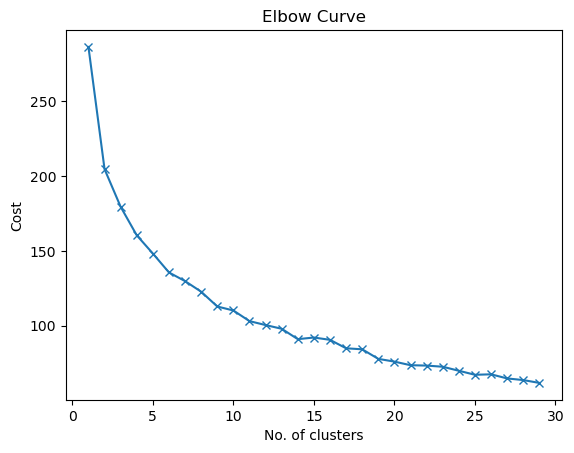

In [10]:
# Elbow curve method
cost = [] 
K = range(1,30) 
for k in list(K):
    kproto = KPrototypes(n_clusters=k, verbose=2, max_iter=20)
    clusters = kproto.fit_predict(personal.values, categorical=[1, 2, 4, 5, 6, 7, 8])
    cost.append(kproto.cost_) 
      
plt.plot(K, cost, 'x-') 
plt.xlabel('No. of clusters') 
plt.ylabel('Cost') 
plt.title('Elbow Curve') 
plt.show()

In [11]:
kproto = KPrototypes(n_clusters=10, verbose=2, max_iter=50)
clusters = kproto.fit_predict(personal.values, categorical=[1, 2, 4, 5, 6, 7, 8])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/50, moves: 49, ncost: 117.04127159630737
Run: 1, iteration: 2/50, moves: 26, ncost: 110.82480458748532
Run: 1, iteration: 3/50, moves: 14, ncost: 108.03964669180739
Run: 1, iteration: 4/50, moves: 4, ncost: 108.00466398219538
Run: 1, iteration: 5/50, moves: 0, ncost: 108.00466398219538
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/50, moves: 35, ncost: 124.63183362382934
Run: 2, iteration: 2/50, moves: 8, ncost: 124.42840385839891
Run: 2, iteration: 3/50, moves: 1, ncost: 123.22389893105809
Run: 2, iteration: 4/50, moves: 5, ncost: 122.07894213750649
Run: 2, iteration: 5/50, moves: 20, ncost: 117.17490406818052
Run: 2, iteration: 6/50, moves: 11, ncost: 113.9117341120467
Run: 2, iteration: 7/50, moves: 2, ncost: 113.7058364412264
Run: 2, iteration: 8/50, mov

In [12]:
clusters

array([8, 8, 9, 5, 8, 8, 0, 1, 8, 9, 5, 1, 0, 2, 6, 9, 7, 8, 0, 5, 7, 7,
       8, 6, 8, 8, 8, 5, 6, 4, 2, 6, 8, 8, 5, 0, 4, 8, 2, 8, 5, 6, 9, 5,
       8, 5, 8, 8, 5, 0, 8, 3, 3, 3, 9, 6, 8, 3, 8, 8, 9, 5, 9, 4, 2, 5,
       8, 3, 4, 4, 0, 0, 5, 4, 0, 0, 8, 5, 3, 4, 8, 6, 4, 8, 6, 7, 4, 8,
       0, 8, 8, 2, 0, 5, 8, 1, 1, 0, 0, 9, 0, 0, 5, 0, 5, 0, 0, 1, 2, 5,
       9, 7, 3, 9, 2, 2, 2, 6, 7, 4, 3, 3, 7, 8, 1, 7, 1, 0, 1, 3, 3, 7,
       7, 7, 1, 3, 1, 7, 1, 1, 3, 0, 0, 1, 7], dtype=uint16)

In [13]:
# assigning clusters and grade to each student
personal['cluster'] = clusters
personal['grade'] = df['grade2']
personal

,age,sex,high_school_type,scholarship_type,additional_work,additional_activity,partner_status,transportation_method,housing,cluster,grade
0,1,male,other,2,yes,no,no,bus,rental,8,50-59
1,1,male,other,2,yes,no,no,bus,rental,8,50-59
2,1,male,state,2,no,no,no,other,dorm,9,50-59
3,0,female,private,2,yes,no,yes,bus,dorm,5,50-59
4,1,male,private,2,no,no,yes,bus,other,8,50-59
...,...,...,...,...,...,...,...,...,...,...,...
140,1,female,state,2,yes,yes,no,bus,dorm,3,80-89
141,0,female,state,3,no,no,no,other,dorm,0,80-89
142,0,female,private,3,no,no,no,bus,rental,0,50-59
143,1,female,state,3,yes,yes,yes,private car/taxi,with family,1,70-79


In [14]:
# creating pivot table to make bar plot
personal_bar = personal.groupby('cluster')['grade'].value_counts(normalize=True).unstack(fill_value=0).stack().reset_index()
personal_bar = personal_bar.pivot(index='cluster', columns='grade', values=0)
personal_bar.index += 1
personal_bar = personal_bar[['fail','50-59', '60-69', '70-79', '80-89', '90-100']]*100
personal_bar

grade,fail,50-59,60-69,70-79,80-89,90-100
cluster,,,,,,
1,4.761905,14.285714,9.523810,0.000000,28.571429,42.857143
2,38.461538,7.692308,7.692308,23.076923,15.384615,7.692308
3,0.000000,33.333333,22.222222,11.111111,33.333333,0.000000
4,7.692308,30.769231,15.384615,30.769231,15.384615,0.000000
5,0.000000,0.000000,20.000000,10.000000,60.000000,10.000000
6,0.000000,23.529412,17.647059,29.411765,11.764706,17.647059
7,0.000000,33.333333,11.111111,44.444444,0.000000,11.111111
8,0.000000,30.769231,30.769231,38.461538,0.000000,0.000000
9,0.000000,33.333333,13.333333,20.000000,30.000000,3.333333


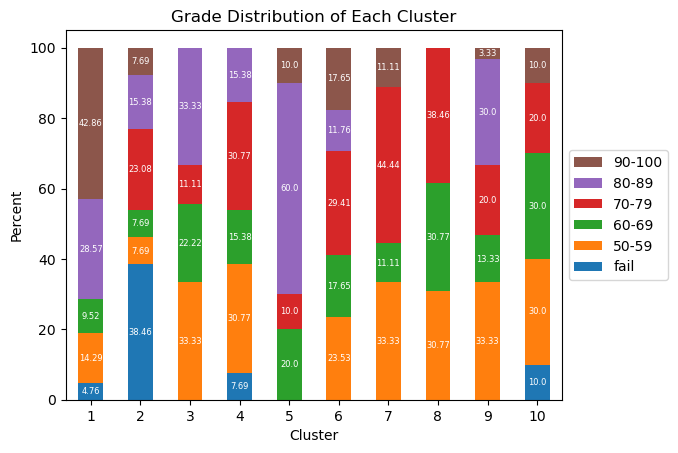

In [15]:
# Creating bar plot
ax = personal_bar.plot(kind='bar', stacked=True)
# labeling each bar
for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [round(v.get_height(),2) if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center', fontsize=6, color='white')
    
plt.ylabel('Percent')
plt.xlabel('Cluster')
plt.title('Grade Distribution of Each Cluster')
plt.xticks(rotation=0)
handles, labels = plt.gca().get_legend_handles_labels()
order = [5, 4, 3, 2, 1, 0] 
plt.legend([handles[i] for i in order], [labels[i] for i in order], loc='center left', bbox_to_anchor=(1, 0.5))

Clustering family variables

In [17]:
family = df[['mother_education', 'father_education', 'siblings', 'parental_status', 'mother_occupation', 'father_occupation']].copy()
# numerically encoding nominal variables
family['mother_education'] = family['mother_education'].replace({'primary school':0, 'secondary school':1, 'high school':2, 'university':3, 'masters':4, 'Ph.D':5})
family['father_education'] = family['father_education'].replace({'primary school':0, 'secondary school':1, 'high school':2, 'university':3, 'masters':4, 'Ph.D':5})
family['siblings'] = family['siblings'].replace({'1':1, '2':2, '3':3, '4':4, '5':5})
family

,mother_education,father_education,siblings,parental_status,mother_occupation,father_occupation
0,0,1,3,married,housewife,other
1,1,2,2,married,housewife,retired
2,1,1,2,married,housewife,retired
3,0,1,5,married,housewife,retired
4,2,2,2,married,housewife,self-employed
...,...,...,...,...,...,...
140,0,1,2,divorced,housewife,self-employed
141,0,0,5,married,housewife,retired
142,2,3,4,married,housewife,self-employed
143,3,3,1,married,government officer,private sector employee


In [18]:
kproto = KPrototypes(n_clusters=10, verbose=2, max_iter=50)
clusters = kproto.fit_predict(family.values, categorical=[3, 4, 5])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/50, moves: 29, ncost: 225.9777267748345
Run: 1, iteration: 2/50, moves: 9, ncost: 220.38052274178253
Run: 1, iteration: 3/50, moves: 0, ncost: 220.38052274178253
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/50, moves: 33, ncost: 224.62801374702562
Run: 2, iteration: 2/50, moves: 9, ncost: 220.45133863472782
Run: 2, iteration: 3/50, moves: 6, ncost: 215.90500276347956
Run: 2, iteration: 4/50, moves: 4, ncost: 214.9618818468981
Run: 2, iteration: 5/50, moves: 0, ncost: 214.9618818468981
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/50, moves: 25, ncost: 228.21797597790797
Run: 3, iteration: 2/

In [19]:
# assigning each student their cluster and grade
family['cluster'] = clusters
family['grade'] = df['grade2']
family

,mother_education,father_education,siblings,parental_status,mother_occupation,father_occupation,cluster,grade
0,0,1,3,married,housewife,other,0,50-59
1,1,2,2,married,housewife,retired,4,50-59
2,1,1,2,married,housewife,retired,0,50-59
3,0,1,5,married,housewife,retired,5,50-59
4,2,2,2,married,housewife,self-employed,3,50-59
...,...,...,...,...,...,...,...,...
140,0,1,2,divorced,housewife,self-employed,0,80-89
141,0,0,5,married,housewife,retired,5,80-89
142,2,3,4,married,housewife,self-employed,2,50-59
143,3,3,1,married,government officer,private sector employee,6,70-79


In [20]:
# creating pivot table in order to make bar plot
family_bar = family.groupby('cluster')['grade'].value_counts(normalize=True).unstack(fill_value=0).stack().reset_index()
family_bar = family_bar.pivot(index='cluster', columns='grade', values=0)
family_bar.index += 1
family_bar = family_bar[['fail','50-59', '60-69', '70-79', '80-89', '90-100']]*100
family_bar

grade,fail,50-59,60-69,70-79,80-89,90-100
cluster,,,,,,
1,3.571429,32.142857,17.857143,17.857143,17.857143,10.714286
2,0.000000,14.285714,14.285714,14.285714,42.857143,14.285714
3,15.384615,38.461538,7.692308,7.692308,23.076923,7.692308
4,10.000000,20.000000,35.000000,5.000000,25.000000,5.000000
5,0.000000,29.411765,11.764706,29.411765,17.647059,11.764706
6,4.761905,28.571429,9.523810,38.095238,14.285714,4.761905
7,5.882353,17.647059,17.647059,29.411765,5.882353,23.529412
8,12.500000,12.500000,25.000000,12.500000,12.500000,25.000000
9,0.000000,7.692308,0.000000,30.769231,46.153846,15.384615


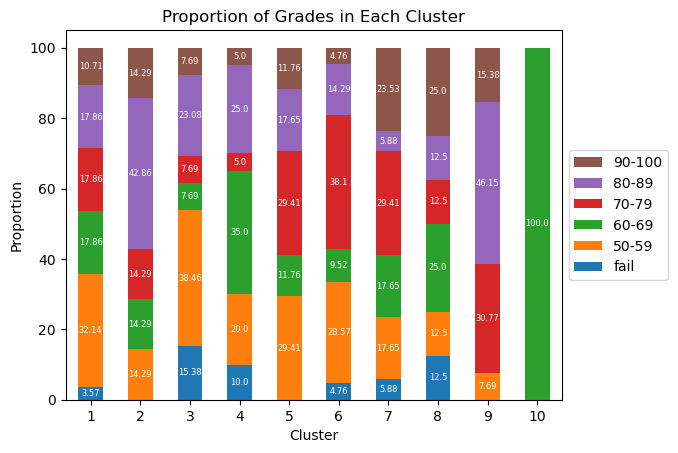

In [21]:
# making bar plot
ax = family_bar.plot(kind='bar', stacked=True)
# labeling each bar
for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [round(v.get_height(),2) if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center', fontsize=6, color='white')

plt.ylabel('Proportion')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.title('Proportion of Grades in Each Cluster')
handles, labels = plt.gca().get_legend_handles_labels()
order = [5, 4, 3, 2, 1, 0] 
plt.legend([handles[i] for i in order], [labels[i] for i in order], loc='center left', bbox_to_anchor=(1, 0.5))

Clustering education variables

In [25]:
education = df[['weekly_study_hours', 'reading_frequency', 'academic_reading_frequency', 'seminar_attendance', 'project_impact', 'class_attendance', 'study_with', 'study_when', 'taking_notes', 'listening_in_class', 'discussion']].copy()
# numerically encoding ordinal variables
education['weekly_study_hours'] = education['weekly_study_hours'].replace({'none':0, '<5 hours':1, '6-10 hours':2, '11-20 hours':3, '>20 hours':4})
education['reading_frequency'] = education['reading_frequency'].replace({'none':0, 'sometimes':1, 'often':2})
education['academic_reading_frequency'] = education['academic_reading_frequency'].replace({'none':0, 'sometimes':1, 'often':2})
education['project_impact'] = education['project_impact'].replace({'positive':2, 'negative':0, 'neutral':1})
education['class_attendance'] = education['class_attendance'].replace({'always':2, 'sometimes':1, 'neutral':0})
education['study_when'] = education['study_when'].replace({'close to exam date':1, 'regularly throughout semester':2, 'never':0})
education['taking_notes'] = education['taking_notes'].replace({'never':0,'sometimes':1, 'always':2})
education['listening_in_class'] = education['listening_in_class'].replace({'never':0, 'sometimes':1, 'always':2})
education['discussion'] = education['discussion'].replace({'never':0, 'sometimes':1, 'always':2})
education

,weekly_study_hours,reading_frequency,academic_reading_frequency,seminar_attendance,project_impact,class_attendance,study_with,study_when,taking_notes,listening_in_class,discussion
0,2,1,1,yes,2,2,alone,1,2,1,0
1,1,1,1,yes,2,2,alone,1,2,1,2
2,1,0,1,yes,2,2,alone,1,1,1,0
3,2,0,1,yes,2,2,alone,2,2,1,1
4,1,0,0,yes,2,2,with friends,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
140,2,2,1,yes,2,2,alone,1,1,0,1
141,2,1,1,no,2,1,alone,1,2,1,1
142,1,1,1,yes,2,2,alone,1,2,2,1
143,1,1,0,yes,2,2,with friends,1,1,0,1


In [26]:
kproto = KPrototypes(n_clusters=10, verbose=2, max_iter=50)
clusters = kproto.fit_predict(education.values, categorical=[3, 6])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/50, moves: 26, ncost: 260.5952935641354
Run: 1, iteration: 2/50, moves: 14, ncost: 249.5332801318611
Run: 1, iteration: 3/50, moves: 3, ncost: 247.52436730747206
Run: 1, iteration: 4/50, moves: 1, ncost: 247.2662183213819
Run: 1, iteration: 5/50, moves: 0, ncost: 247.2662183213819
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/50, moves: 24, ncost: 248.59393132629793
Run: 2, iteration: 2/50, moves: 10, ncost: 242.95108757616816
Run: 2, iteration: 3/50, moves: 3, ncost: 241.72021750482796
Run: 2, iteration: 4/50, moves: 2, ncost: 240.23036167484955
Run: 2, iteration: 5/50, moves: 2, ncost: 239.29331004774716
Run: 2, iteration: 6/50, moves: 1, ncost: 239.09699518163447
Run: 2, iteration: 7/50, moves: 0, ncost: 239.09699518163447
Init: initializing centroids
Ini

In [27]:
# assigning cluster and grade to each student
education['cluster'] = clusters
education['grade'] = df['grade2']
education

,weekly_study_hours,reading_frequency,academic_reading_frequency,seminar_attendance,project_impact,class_attendance,study_with,study_when,taking_notes,listening_in_class,discussion,cluster,grade
0,2,1,1,yes,2,2,alone,1,2,1,0,9,50-59
1,1,1,1,yes,2,2,alone,1,2,1,2,0,50-59
2,1,0,1,yes,2,2,alone,1,1,1,0,6,50-59
3,2,0,1,yes,2,2,alone,2,2,1,1,4,50-59
4,1,0,0,yes,2,2,with friends,1,1,1,1,4,50-59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2,2,1,yes,2,2,alone,1,1,0,1,9,80-89
141,2,1,1,no,2,1,alone,1,2,1,1,9,80-89
142,1,1,1,yes,2,2,alone,1,2,2,1,5,50-59
143,1,1,0,yes,2,2,with friends,1,1,0,1,3,70-79


In [28]:
# creating pivot table in order to create bar plot
education_bar = education.groupby('cluster')['grade'].value_counts(normalize=True).unstack(fill_value=0).stack().reset_index()
education_bar = education_bar.pivot(index='cluster', columns='grade', values=0)
education_bar.index += 1
education_bar = education_bar[['fail','50-59', '60-69', '70-79', '80-89', '90-100']]*100
education_bar

grade,fail,50-59,60-69,70-79,80-89,90-100
cluster,,,,,,
1,8.000000,20.000000,4.000000,12.000000,36.000000,20.000000
2,0.000000,40.000000,0.000000,20.000000,20.000000,20.000000
3,0.000000,0.000000,23.076923,23.076923,46.153846,7.692308
4,0.000000,30.769231,15.384615,38.461538,7.692308,7.692308
5,10.000000,40.000000,10.000000,30.000000,10.000000,0.000000
6,0.000000,38.461538,7.692308,23.076923,15.384615,15.384615
7,10.000000,20.000000,40.000000,10.000000,20.000000,0.000000
8,0.000000,0.000000,60.000000,40.000000,0.000000,0.000000
9,5.263158,21.052632,15.789474,36.842105,5.263158,15.789474


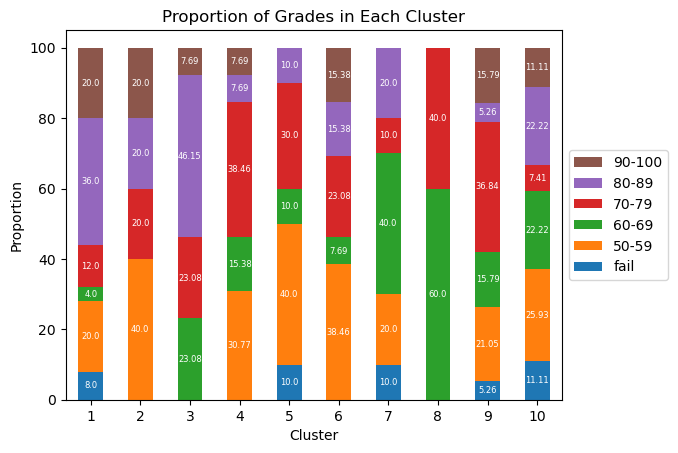

In [29]:
# creating bar plot
ax = education_bar.plot(kind='bar', stacked=True)
# labeling each bar
for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [round(v.get_height(),2) if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center', fontsize=6, color='white')
    
plt.ylabel('Proportion')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.title('Proportion of Grades in Each Cluster')
handles, labels = plt.gca().get_legend_handles_labels()
order = [5, 4, 3, 2, 1, 0] 
plt.legend([handles[i] for i in order], [labels[i] for i in order], loc='center left', bbox_to_anchor=(1, 0.5))